##Importing relevant packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement_dataset.csv")

In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.shape

(2966, 8)

In [9]:
df.drop(['Hostel'], axis=1, inplace=True)

In [10]:
# converting data from string to integer for statistical analysis and predictions

df['Gender'].replace({'Male':'1','Female':'0'},inplace = True)

In [11]:
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1
1,21,0,Computer Science,0,7,1,1
2,22,0,Information Technology,1,6,0,1
3,21,1,Information Technology,0,8,1,1
4,22,1,Mechanical,0,8,0,1


In [12]:
df['Stream'].replace({'Electronics And Communication':'0','Computer Science':'1','Information Technology':'2',
                      'Mechanical':'3','Electrical':'4','Civil':'5'}, inplace=True)

In [13]:
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,2,1,6,0,1
3,21,1,2,0,8,1,1
4,22,1,3,0,8,0,1


In [14]:
df.isnull().sum()  #checking null values

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [15]:
Y = df['PlacedOrNot']
X = df.drop(['PlacedOrNot'], axis=1)

In [16]:
X

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,1,0,1,8,1
1,21,0,1,0,7,1
2,22,0,2,1,6,0
3,21,1,2,0,8,1
4,22,1,3,0,8,0
...,...,...,...,...,...,...
2961,23,1,2,0,7,0
2962,23,1,3,1,7,0
2963,22,1,2,1,7,0
2964,22,1,1,1,7,0


##train_test_split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(2966, 6) (2372, 6) (594, 6)


In [19]:
print(Y.shape, Y_train.shape, Y_test.shape)

(2966,) (2372,) (594,)


## K - Nearest Neighbors

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(X)

MinMaxScaler()

In [23]:
X = scaler.transform(X)
X

array([[0.27272727, 1.        , 0.        , 0.33333333, 0.75      ,
        1.        ],
       [0.18181818, 0.        , 0.2       , 0.        , 0.5       ,
        1.        ],
       [0.27272727, 0.        , 0.4       , 0.33333333, 0.25      ,
        0.        ],
       ...,
       [0.27272727, 1.        , 0.4       , 0.33333333, 0.5       ,
        0.        ],
       [0.27272727, 1.        , 0.2       , 0.33333333, 0.5       ,
        0.        ],
       [0.36363636, 1.        , 1.        , 0.        , 0.75      ,
        0.        ]])

In [24]:
acc = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)
    acc.append(ac)

maximum acc =0.8602693602693603 at k = 23


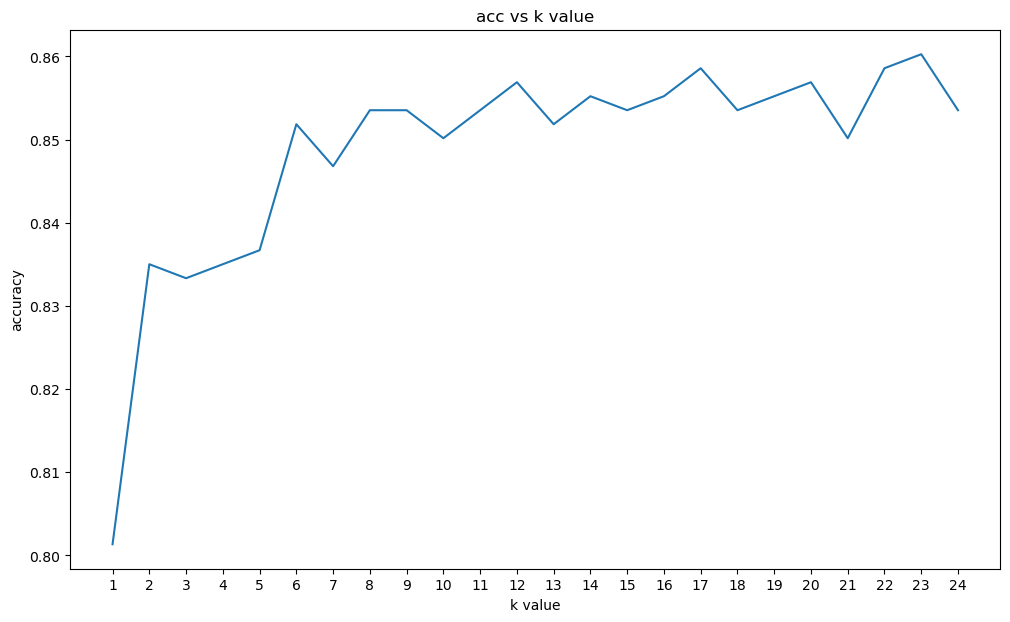

In [25]:
plt.figure(figsize = (12, 7))
plt.plot(range(1, 25),  acc)
plt.title("acc vs k value")
plt.xlabel("k value")
plt.xticks(range(1, 25))
plt.ylabel("accuracy")
print(f"maximum acc ={max(acc)} at k = {np.array(acc).argmax() + 1}")
plt.show()

In [26]:
Knn = KNeighborsClassifier(n_neighbors=23, metric = "euclidean")
Knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [27]:
Y_pred = Knn.predict(X_test)
Y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [28]:
Y_test

1025    1
2738    1
504     0
605     1
418     0
       ..
299     1
2427    1
1827    1
2736    1
1053    0
Name: PlacedOrNot, Length: 594, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[245,  25],
       [ 58, 266]], dtype=int64)

In [30]:
accuracy_KNN=accuracy_score(Y_test, Y_pred)

In [31]:
accuracy_KNN

0.8602693602693603

In [32]:
#CONFUSION MATRIX
tp = cm[1][1]
tn = cm[0][0]
fp = cm[1][0]
fn = cm[0][1]

In [33]:
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred)

0.9140893470790378

In [34]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred )
print(f1)

0.865040650406504


## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [36]:
Y_pred = dtree.predict(X_test)
Y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [37]:
Y_test

1025    1
2738    1
504     0
605     1
418     0
       ..
299     1
2427    1
1827    1
2736    1
1053    0
Name: PlacedOrNot, Length: 594, dtype: int64

In [38]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[242,  28],
       [ 62, 262]], dtype=int64)

In [39]:
accuracy_Decision_Tree=accuracy_score(Y_test, Y_pred)

In [40]:
accuracy_Decision_Tree

0.8484848484848485

In [41]:
#CONFUSION MATRIX

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

In [42]:
precision_score(Y_test, Y_pred)

0.903448275862069

In [43]:
f2 = f1_score(Y_test, Y_pred )
print(f2)

0.8534201954397395


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators = 50, max_depth=2, random_state=0)

In [46]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)

In [47]:
Y_pred = Knn.predict(X_test)

In [48]:
accuracy_Random_forest=accuracy_score(Y_test, Y_pred)

In [49]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[245,  25],
       [ 58, 266]], dtype=int64)

In [50]:
accuracy_Random_forest

0.8602693602693603

In [51]:
#F1_score
f4 = f1_score(Y_test, Y_pred )
print(f1)

0.865040650406504


In [52]:
#CONFUSION MATRIX
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

In [53]:
precision_score(Y_test, Y_pred)

0.9140893470790378

## Naive Bayes

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [57]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,

In [58]:
Y_test

1025    1
2738    1
504     0
605     1
418     0
       ..
299     1
2427    1
1827    1
2736    1
1053    0
Name: PlacedOrNot, Length: 594, dtype: int64

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test,Y_pred)

In [60]:
cm

array([[220,  50],
       [ 68, 256]], dtype=int64)

In [61]:
ac

0.8013468013468014

In [62]:
algorithms=['K Nearest Neighbors','Decision Tree','Random forest ','GaussianNB']
scores=[accuracy_KNN,accuracy_Decision_Tree,accuracy_Random_forest,ac]

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

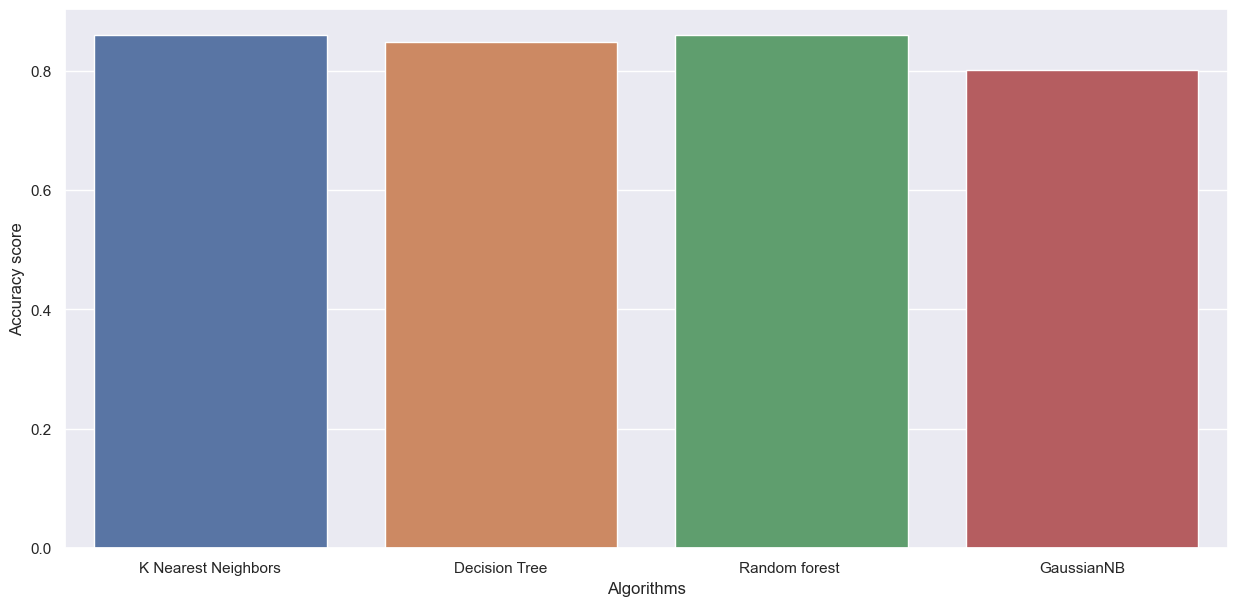

In [64]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x = algorithms,y = scores)